<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/06_1-Reduccion-Dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2024-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para implementar el algoritmo k-Nearest Neighbors (kNN) en Python.



Los paquetes necesarios son:

In [1]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs # Dataset
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación

# Algoritmo k-NN
from sklearn.neighbors import KNeighborsClassifier

---
## <font color='264CC7'> Ejemplo </font>

En el siguiente código, se muestra un ejemplo de cómo implementar el algoritmo k-Nearest Neighbors (kNN) en Python. Primero carguemos los datos y analicemos su estructura.

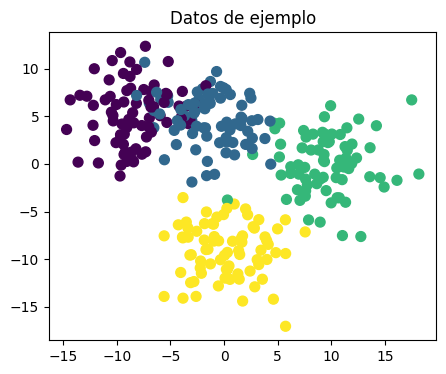

In [2]:
# Generamos los datos
X, y = make_blobs(n_samples=300, centers=4, cluster_std=3, random_state=7)

# Visualizar los datos
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')
plt.title('Datos de ejemplo')
plt.show()


Dividimos los datos en los conjuntos de entrenamiento y prueba.

In [3]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamos el modelo:

In [4]:
# Crear y entrenar el modelo kNN con k=5
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train, y_train)

KNeighborsClassifier()

Revisamos la precisión del modelo:

In [5]:
# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.87
Matriz de confusión:
[[10  3  0  0]
 [ 3 17  0  0]
 [ 0  2 16  0]
 [ 0  0  0  9]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.77      0.85      0.81        20
           2       1.00      0.89      0.94        18
           3       1.00      1.00      1.00         9

    accuracy                           0.87        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.87      0.87      0.87        60



Podemos visualizar las regiones de decisión del modelo:

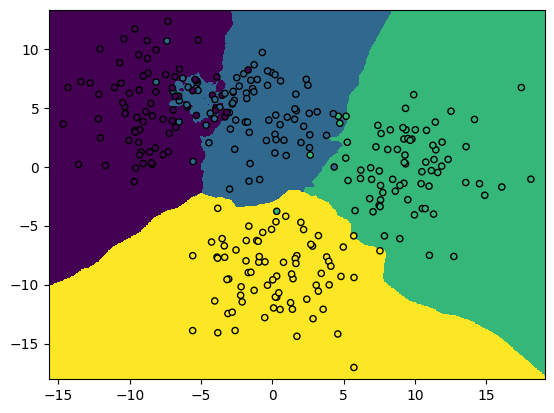

In [6]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import numpy as np

# Datos para el fondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                         np.arange(y_min, y_max, 0.05))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap='viridis')
 
# Puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
 
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Establecer k = 3 y comparar los resultados con k = 5.
</div>
</br>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Utilizar la métrica de distancia `manhattan` en lugar de `euclidean`.
</div>
</br>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Cambiar el tamaño del conjunto de prueba a 40% y analizar el impacto en la precisión.
</div>

---
## <font color='264CC7'> Ejemplo práctico </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero leamos los datos y seleccionemos las columnas que utilizaremos:

In [7]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/andres-merino/AprendizajeAutomaticoInicial-05-N0105/refs/heads/main/2-Notebooks/datos/Pokemon.csv')
# Tomo las columnas de interés
numeric_cols = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP']
class_col = ['Stage']
data = data[['Name', *numeric_cols, *class_col]]
# Muestro los primeros registros
display(data.head())

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
0,Bulbasaur,49,49,45,65,65,45,1
1,Ivysaur,62,63,60,80,80,60,2
2,Venusaur,82,83,80,100,100,80,3
3,Charmander,52,43,65,60,50,39,1
4,Charmeleon,64,58,80,80,65,58,2


Revisemos los datos:

In [8]:
data.describe()

,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,72.549669,68.225166,68.933775,67.139073,66.019868,64.211921,1.582781
std,26.596162,26.916704,26.746880,28.534199,24.197926,28.590117,0.676832
min,5.000000,5.000000,15.000000,15.000000,20.000000,10.000000,1.000000
25%,51.000000,50.000000,46.500000,45.000000,49.000000,45.000000,1.000000
50%,70.000000,65.000000,70.000000,65.000000,65.000000,60.000000,1.000000
75%,90.000000,84.000000,90.000000,87.500000,80.000000,80.000000,2.000000
max,134.000000,180.000000,140.000000,154.000000,125.000000,250.000000,3.000000


Escalemos los datos:

In [9]:
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:-1])

### <font color='264CC7'> Determinación del valor de k </font>

Para determinar el valor de k, podemos iterar sobre un rango de valores y comparar la precisión de cada uno:

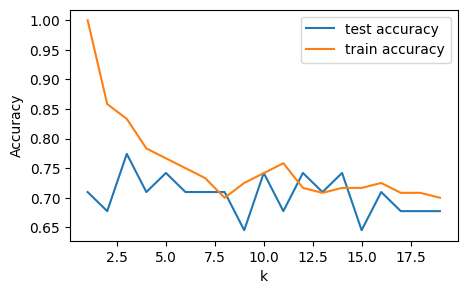

In [10]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, data['Stage'], test_size=0.2, random_state=42, stratify=data['Stage'])

# Determinar el mejor valor de k
k_values = range(1, 20)

# Precisión de los modelos
precisions_test = []
precisions_train = []

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

# Visualizar la precisión en función de k
plt.figure(figsize=(5, 3))
plt.plot(k_values, precisions_test, label="test accuracy")
plt.plot(k_values, precisions_train, label="train accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()
plt.show()

El número óptimo parece ser 5 en este caso.

### <font color='264CC7'> Modelo kNN </font>

Generemos el modelo con k = 5:

In [11]:
# Realizamos el agrupamiento
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.74
Matriz de confusión:
[[12  4  0]
 [ 1 10  1]
 [ 0  2  1]]
Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.92      0.75      0.83        16
           2       0.62      0.83      0.71        12
           3       0.50      0.33      0.40         3

    accuracy                           0.74        31
   macro avg       0.68      0.64      0.65        31
weighted avg       0.77      0.74      0.74        31

